# Múltiples subtramas

A veces es útil comparar diferentes vistas de datos una al lado de la otra.
Con este fin, Matplotlib tiene el concepto de *subparcelas*: grupos de ejes más pequeños que pueden existir juntos dentro de una sola figura.
Estas subparcelas pueden ser recuadros, cuadrículas de parcelas u otros diseños más complicados.
En esta sección, exploraremos cuatro rutinas para crear subparcelas en Matplotlib.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## ``plt.axes``: subparcelas a mano
El método más básico para crear ejes es usar la función ``plt.axes``.
Como hemos visto anteriormente, por defecto esto crea un objeto de ejes estándar que llena toda la figura.
``plt.axes`` también toma un argumento opcional que es una lista de cuatro números en el sistema de coordenadas de la figura.
Estos números representan ``[izquierda, abajo, ancho, alto]`` en el sistema de coordenadas de la figura, que va desde 0 en la parte inferior izquierda de la figura hasta 1 en la parte superior derecha de la figura.
Por ejemplo, podríamos crear ejes insertados en la esquina superior derecha de otros ejes estableciendo la posición *x* e *y* en 0,65 (es decir, comenzando en el 65 % del ancho y el 65 % del alto del eje). figura) y *x* e *y* se extienden a 0,2 (es decir, el tamaño de los ejes es el 20 % del ancho y el 20 % de la altura de la figura):

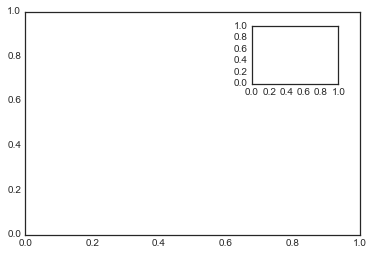

In [ ]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

El equivalente de este comando dentro de la interfaz orientada a objetos es ``fig.add_axes()``. Usemos esto para crear dos ejes apilados verticalmente:

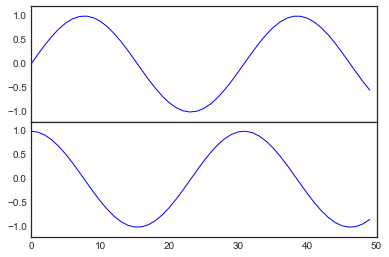

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

Ahora tenemos dos ejes (el superior sin etiquetas de marca) que solo se tocan: la parte inferior del panel superior (en la posición 0,5) coincide con la parte superior del panel inferior (en la posición 0,1 + 0,4).

## ``plt.subplot``: Cuadrículas simples de subtramas
Las columnas o filas alineadas de subgráficos son una necesidad tan común que Matplotlib tiene varias rutinas convenientes que facilitan su creación.
El nivel más bajo de estos es ``plt.subplot()``, que crea una única subtrama dentro de una cuadrícula.
Como puede ver, este comando toma tres argumentos enteros: el número de filas, el número de columnas y el índice de la gráfica que se creará en este esquema, que va desde la parte superior izquierda hasta la parte inferior derecha:

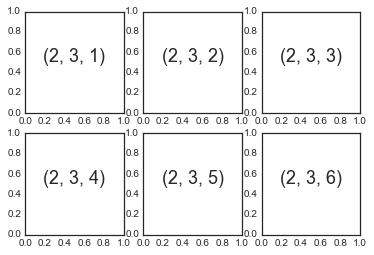

In [ ]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

El comando ``plt.subplots_adjust`` se puede usar para ajustar el espacio entre estos gráficos.
El siguiente código usa el comando orientado a objetos equivalente, ``fig.add_subplot()``:

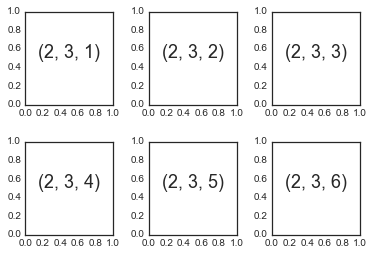

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

Hemos usado los argumentos ``hspace`` y ``wspace`` de ``plt.subplots_adjust``, que especifican el espacio a lo largo de la altura y el ancho de la figura, en unidades del tamaño de la subparcela (en este caso, el espacio es 40% del ancho y alto de la subparcela).

## ``plt.subplots``: toda la cuadrícula de una sola vez
El enfoque que se acaba de describir puede volverse bastante tedioso cuando se crea una cuadrícula grande de subgráficos, especialmente si desea ocultar las etiquetas de los ejes x e y en los gráficos internos.
Para este propósito, ``plt.subplots()`` es la herramienta más fácil de usar (tenga en cuenta la ``s`` al final de ``subplots``). En lugar de crear una única subparcela, esta función crea una cuadrícula completa de subparcelas en una sola línea y las devuelve en una matriz NumPy.
Los argumentos son el número de filas y el número de columnas, junto con las palabras clave opcionales ``sharex`` y ``sharey``, que le permiten especificar las relaciones entre diferentes ejes.
Aquí crearemos una cuadrícula de $2 \times 3$ de subparcelas, donde todos los ejes en la misma fila comparten su escala del eje y, y todos los ejes en la misma columna comparten su escala del eje x:

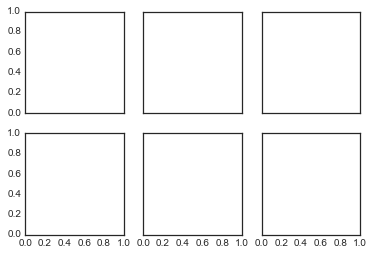

In [ ]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Tenga en cuenta que al especificar ``sharex`` y ``sharey``, eliminamos automáticamente las etiquetas internas en la cuadrícula para que la trama sea más limpia.
La cuadrícula resultante de instancias de ejes se devuelve dentro de una matriz NumPy, lo que permite una especificación conveniente de los ejes deseados utilizando la notación de indexación de matriz estándar:

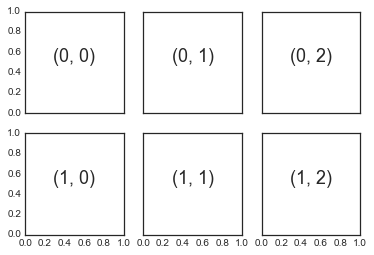

In [ ]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

En comparación con ``plt.subplot()``, ``plt.subplots()`` es más consistente con la indexación convencional basada en 0 de Python.

## ``plt.GridSpec``: arreglos más complicados
Para ir más allá de una cuadrícula regular a subparcelas que abarcan múltiples filas y columnas, ``plt.GridSpec()`` es la mejor herramienta.
El objeto ``plt.GridSpec()`` no crea un gráfico por sí mismo; es simplemente una interfaz conveniente que es reconocida por el comando ``plt.subplot()``.
Por ejemplo, una especificación de cuadrícula para una cuadrícula de dos filas y tres columnas con un espacio de ancho y alto especificado se ve así:

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

A partir de esto, podemos especificar las ubicaciones y las extensiones de las subparcelas utilizando la conocida sintaxis de división de Python:

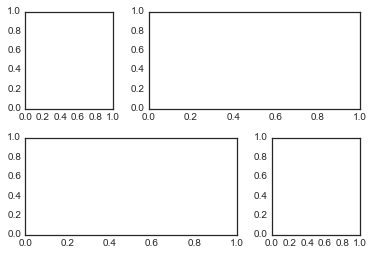

In [ ]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

Este tipo de alineación de cuadrícula flexible tiene una amplia gama de usos.
Lo uso con mayor frecuencia cuando creo gráficos de histogramas de ejes múltiples como los que se muestran aquí:

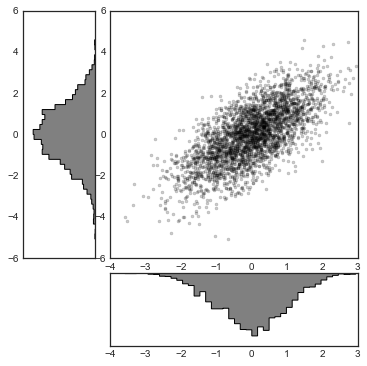

In [ ]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

Este tipo de distribución trazada a lo largo de sus márgenes es tan común que tiene su propia API de trazado en el paquete Seaborn; consulte [Visualización con Seaborn](04.14-Visualización-con-Seaborn.ipynb) para obtener más detalles.